# Supervised Learning with the Iris dataset - Francis Dugdale

In [9]:
#This is a classic dataset upon which I will conduct a basic classification exercise in order to practice and develop my understanding of basic machine learning problems in python.
#The project will use supervised learning methods to create predictive models and my aim is simply to build some accurate models.
#First I will use a Logistic Regression model, and then a k-nearest neighbours model. with two different values for k.

In [10]:
import pandas as pd
import numpy as np


In [11]:
from matplotlib import pyplot as plt



In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

type(iris)

#The data set consists of information on 150 samples of Iris flower.
#There are 50 samples from three different species of Iris (Iris setosa, Iris virginica and Iris versicolor).
#Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

#I will study the data in an attempt to classify a given sample as one of the three different species types, based on its recorded features.

sklearn.utils.Bunch

In [13]:

#First we seperate the dataset into keys and targets (features and species).
features = iris.data.T
species = iris.target

#Next we denote the different feature.
sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]


type(petal_width)

numpy.ndarray

In [14]:
#So printing one of these, for example sepal_width, we can see all the different values for sepal width.
print(sepal_width)


[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2
 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2
 3.3 3.  2.5 3.  3.4 3. ]


In [15]:
#This is not very informative however in regards to our classification exercise.


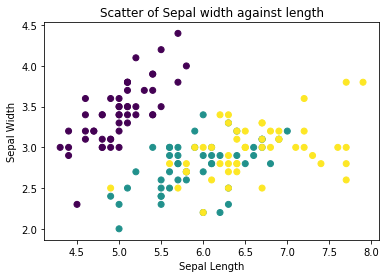

In [30]:
#Firstly we create some simple scatter diagrams to visualise and develop and understanding of the relationship between the species and its features.
#The first plot will simply be sepal width against sepal length:

plt.scatter(sepal_length, sepal_width, c=species)
#By using matplotlib's scatter plot we can tell it to paint the different species seperate colours, helping us to spot any simple trends easily.

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Scatter of Sepal width against length")
plt.show()

In [17]:
#Immediately we see some interesting information:
#Purple species tend to have short and narrow sepals, there also is perhaps less variation in size among them.
#Yellow have the widest and most varied in length, while being the longest on average.
#Blue sepals sit inbetween the two.


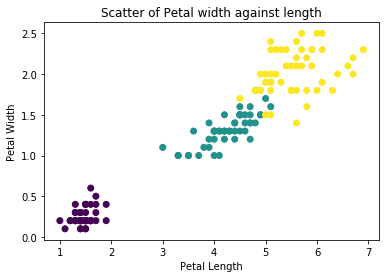

In [18]:
#Similarly we can plot petal length against petal width.

plt.scatter(petal_length, petal_width, c=species)
#By using matplotlib's scatter plot we can tell it to paint the different species seperate colours, helping us to spot any simple trends easily.

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Scatter of Petal width against length")
plt.show()

In [19]:
#Here we can make similar initial observations,
#namely that purple have the smallest and shortest petals,
#blue are medium in size and yellow the longest and widest.
#We can also see a similar story in the levels of variation shown by each species.

# Simple Logistic Regression Model:

In [20]:
#To begin our analysis we will start with a simple logistic regression model, imported from sklearn.
from sklearn.linear_model import LogisticRegression


In [21]:
#Now we split the data into 80% training and 20% testing for the model.
#For this we import the following from sklearn.

from sklearn.model_selection import train_test_split

features_train, features_test, species_train, species_test = train_test_split(features.T, species, test_size = 0.2)

#We used the transpose of the array 'features' in order to make the splitting function work.


In [114]:
#Now we train the model:
log_reg_model = LogisticRegression()
log_reg_model.fit(features_train, species_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
#Testing the model:

log_reg_model_predictions = log_reg_model.predict(features_test)

#Lets have a look at the predictions against the real data:
print('Actual Species')
print(species_test)
print()
print('Predicted Species')
print(log_reg_model_predictions)

Actual Species
[2 1 0 0 1 0 1 0 1 1 2 2 0 0 2 1 0 0 2 0 1 1 0 2 1 1 2 0 2 2]

Predicted Species
[2 2 0 0 1 0 1 0 1 1 2 2 0 0 2 1 0 0 1 0 1 1 0 2 1 1 2 0 2 2]


In [81]:
#By inspection we can see already that only a few of the samples have had their species innacurately predicted.
#We can use the following metrics to test the model mathematically.

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Checking the precision of our model:

print(classification_report(species_test, log_reg_model_predictions))
#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [83]:
#Recall that in our dataset the numbers 0, 1 and 2 refer to the three species of iris; Setosa, Versicolor and Virginica.
#The model correctly identified all the Setosa, 90% of the Versicolor and 89% of the Virginica, a very high degree of precision.


#Testing accuracy:
print(accuracy_score(species_test,log_reg_model_predictions))

0.9333333333333333


In [ ]:
#Confirming what we already saw in our inspection comparison, that the model is very accurate.

# K-Nearest Neighbours:

In [102]:
#Now we will use another type of simple predicted model, again imported from sklearn.

from sklearn.neighbors import KNeighborsClassifier

#For simplicity we will start with K=1.
knn_1 = KNeighborsClassifier(n_neighbors = 1)


In [103]:
#Using the same training testing data splitting method as before:

knn_features_train, knn_features_test, knn_species_train, knn_species_test = train_test_split(features.T, species, test_size = 0.2, random_state = 0)
knn_1.fit(knn_features_train, knn_species_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [104]:
#Now lets pick a sample from our dataset to see if this model can predict its species.

X = np.array([[4.7, 3.2, 1.3, 0.2]])
#This happens to be a Setosa species.

knn_1.predict(X)


array([0])

In [105]:
#This means that our model predicts correctly that this particular point is Setosa, but we can also evaluate the model mathematically.

knn_1_predictions = knn_1.predict(features_test)
print(classification_report(species_test, knn_1_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [108]:
#Again this is very accurate, this time with no inaccuracies.

#Lets now try K = 5.


knn_5_features_train, knn_5_features_test, knn_5_species_train, knn_5_species_test = train_test_split(features.T, species, test_size = 0.2, random_state = 0)

In [109]:

knn_5 = KNeighborsClassifier(n_neighbors = 5)

knn_5.fit(knn_5_features_train, knn_5_species_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
#Now lets pick a sample from our dataset to see if this model can predict its species.

X = np.array([[4.7, 3.2, 1.3, 0.2]])
#This happens to be a Setosa species.

knn_5.predict(X)

array([0])

In [111]:
#This means that our model predicts correctly that this particular point is Setosa, but we can also evaluate the model mathematically.

knn_5.score(knn_5_features_test, knn_5_species_test)

0.9666666666666667

In [113]:
knn_5_predictions = knn_5.predict(knn_5_features_test)
print(classification_report(knn_5_species_test, knn_5_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Clearly with k=5 we see less accuracy than the 100% exhibited by the k=1 model.
#Based on this and the fact that this dataset is rather famous for being, I would conclude that k=1 is optimal.

In [ ]:
#Both of these models are extremely capable of predicting the species from the features of the sample.
#This is likely because the iris dataset is famous for being very easy to make predictions!